## 0. 데이터 및 모델 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

with open('data/titanic.pkl','rb') as f:
    data = joblib.load(f)
    print(data.keys())
locals().update(data)

dict_keys(['titanic', 'dt'])


## 1. 데이터 탐색

In [2]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


- Survived: 생존여부(0:사망, 1:생존)
- PClass: 티켓등급
- Sex: 성별(0:여성, 1:남성)
- Age: 나이
- SibSp: 함께 탑승한 형제/배우자의 수
- Parch: 함께 탑승한 부모/자녀의 수
- Fare: 승선권요금
- Cabin: 객실번호
- Embarked: 기항지 위치

### 1.1. 목표변수의 분포 확인

- Survived의 countplot

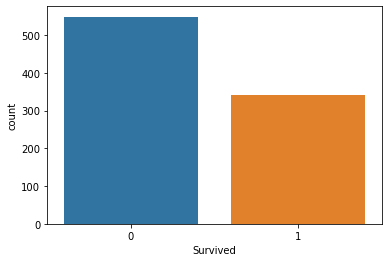

In [4]:
sns.countplot(x=titanic.Survived);

- 성별에 따른 목표변수 분포 확인

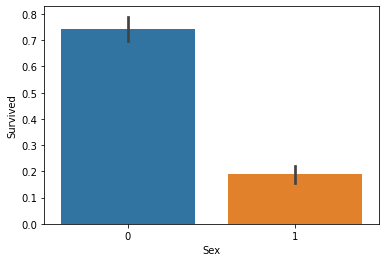

In [5]:
sns.barplot(x='Sex', y='Survived', data=titanic);

- 객실등급/성별에 따른 목표변수 분포 확인

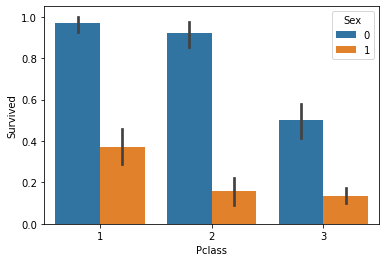

In [6]:
sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Sex');

## 2. 평가

- 예측값 생성

In [7]:
pred = dt.predict(titanic.drop('Survived', axis='columns'))
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### 2.1. confusion_matrix

- confusion_matrix : [[TP, FN
  FP, TN]]

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(titanic.Survived, pred)

array([[528,  21],
       [ 23, 319]])

- confusion_matrix_plot

/Users/moon/miniforge3/envs/my_tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


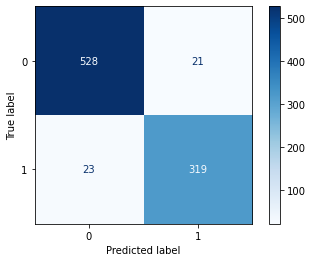

In [9]:
from sklearn.metrics import plot_confusion_matrix
x = titanic.drop(columns='Survived')
y = titanic['Survived']
plot_confusion_matrix(dt, x, y, cmap=plt.cm.Blues);

- 분류기준값에 따른 confusion_matrix의 변화

In [10]:
pred = dt.predict_proba(titanic.drop('Survived', axis='columns'))
pred

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [11]:
threshold = 0.5
confusion_matrix(titanic.Survived, pred[:, 1]>threshold)

array([[528,  21],
       [ 23, 319]])

In [12]:
threshold = 0.2
confusion_matrix(titanic.Survived, pred[:, 1]>threshold)

array([[511,  38],
       [ 13, 329]])

### 2.2. precision & recall & F1

- Precision_recall_curve

In [13]:
from sklearn.metrics import precision_recall_curve
pr, re, th = precision_recall_curve(titanic.Survived, pred[:, 1])

In [14]:
pd.DataFrame({'Precision':pr[:len(th)], 'Recall':re[:len(th)], 'Threshold':th})

,Precision,Recall,Threshold
0,0.383838,1.000000,0.000000
1,0.896458,0.961988,0.250000
2,0.911111,0.959064,0.333333
3,0.915730,0.953216,0.500000
4,0.938235,0.932749,0.875000
5,0.939759,0.912281,1.000000


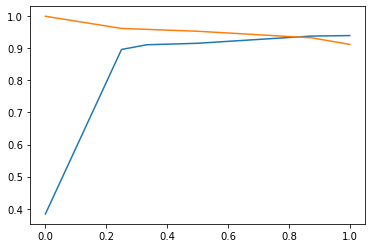

In [15]:
plt.plot(th, pr[:len(th)])
plt.plot(th, re[:len(th)])

- 분류기준값에 따른 precision, recall, f1 비교

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
threshold = 0.5
print(accuracy_score(titanic.Survived, pred[:,1]>threshold))
print(precision_score(titanic.Survived, pred[:,1]>threshold))
print(recall_score(titanic.Survived, pred[:,1]>threshold))
print(f1_score(titanic.Survived, pred[:,1]>threshold))

0.9506172839506173
0.9382352941176471
0.9327485380116959
0.9354838709677419


In [17]:
threshold = 0.2
print(accuracy_score(titanic.Survived, pred[:,1]>threshold))
print(precision_score(titanic.Survived, pred[:,1]>threshold))
print(recall_score(titanic.Survived, pred[:,1]>threshold))
print(f1_score(titanic.Survived, pred[:,1]>threshold))

0.9427609427609428
0.896457765667575
0.9619883040935673
0.9280677009873061


### 2.3. roc-auc

In [18]:
from sklearn.metrics import roc_curve
fprs, tprs, th = roc_curve(titanic.Survived, pred[:,1])

In [19]:
pd.DataFrame({'fprs':fprs[:len(th)], 'tprs':tprs[:len(th)], 'threshold':th})

,fprs,tprs,threshold
0,0.000000,0.000000,2.000000
1,0.036430,0.912281,1.000000
2,0.038251,0.932749,0.875000
3,0.054645,0.953216,0.500000
4,0.058288,0.959064,0.333333
5,0.069217,0.961988,0.250000
6,1.000000,1.000000,0.000000


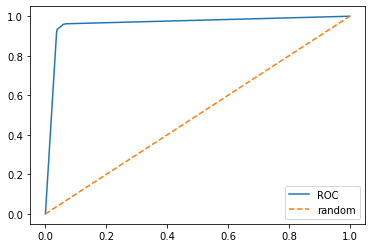

In [20]:
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1],[0,1], '--', label='random')
plt.legend()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(titanic.Survived, pred[:,1])

0.960829898060269

### 2.4. Lift

In [22]:
titanic['pred'] = pred[:,1]
titanic = titanic.sort_values(['pred','Survived'], ascending=False).reset_index(drop=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,pred
0,1,1,0,38.0,1,0,71.2833,2,0,1.0
1,1,3,0,26.0,0,0,7.9250,8,2,1.0
2,1,1,0,35.0,1,0,53.1000,2,2,1.0
3,1,3,0,27.0,0,2,11.1333,8,2,1.0
4,1,2,0,14.0,1,0,30.0708,8,0,1.0


- 누적 Response 계산

In [23]:
titanic['response'] = titanic.Survived.cumsum() / (titanic.index+1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,pred,response
0,1,1,0,38.0,1,0,71.2833,2,0,1.0,1.0
1,1,3,0,26.0,0,0,7.9250,8,2,1.0,1.0
2,1,1,0,35.0,1,0,53.1000,2,2,1.0,1.0
3,1,3,0,27.0,0,2,11.1333,8,2,1.0,1.0
4,1,2,0,14.0,1,0,30.0708,8,0,1.0,1.0


- Lift 계산

In [24]:
titanic.Survived.mean()

0.3838383838383838

In [25]:
titanic['lift'] = titanic['response'] / titanic.Survived.mean()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,pred,response,lift
0,1,1,0,38.0,1,0,71.2833,2,0,1.0,1.0,2.605263
1,1,3,0,26.0,0,0,7.9250,8,2,1.0,1.0,2.605263
2,1,1,0,35.0,1,0,53.1000,2,2,1.0,1.0,2.605263
3,1,3,0,27.0,0,2,11.1333,8,2,1.0,1.0,2.605263
4,1,2,0,14.0,1,0,30.0708,8,0,1.0,1.0,2.605263


- Lift Chart 시각화

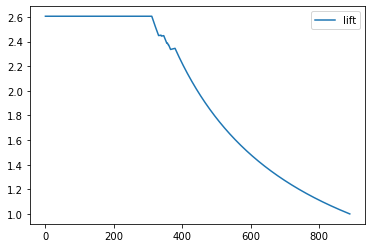

In [26]:
plt.plot(titanic.index, titanic.lift, label='lift')
plt.legend();